###Import tensorflow and download MNIST data

In [1]:
import tensorflow as tf

In [ ]:
data = tf.keras.datasets.mnist

(train,train_labels),(test,test_labels) = data.load_data()

####Apply data augmentation using ImageDataGenerator and plot few samples 

In [18]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            rescale=1/255
          )

train_gen = data_gen.flow(train.reshape(train.shape[0],28,28,1),train_labels,)
test_gen  = data_gen.flow(test.reshape(test.shape[0],28,28,1),test_labels)

32 images in batch 1 of training data 




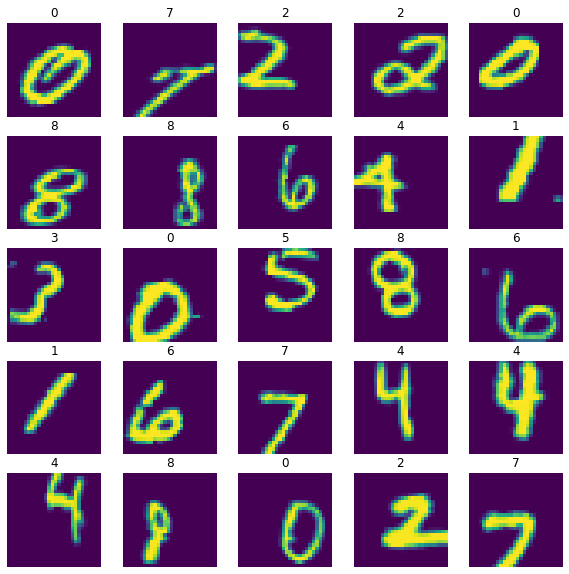

In [17]:
import math
import matplotlib.pyplot as plt


t = next(train_gen)

img_count = len(t[0])
print(f"{img_count} images in batch 1 of training data \n\n" )


fig = plt.figure(figsize=(10, 10))
columns = int(math.sqrt(img_count))
rows = int(math.sqrt(img_count))
for i in range(1, columns*rows +1):
    img = t[0][i-1].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(str(t[1][i-1]))
    plt.axis("off")
plt.show()

#### Define layers, compile and then fit model

In [19]:
layers = [
           tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation = tf.nn.relu),
           tf.keras.layers.MaxPool2D(2,2),
           tf.keras.layers.Conv2D(64,(3,3),activation = tf.nn.relu),
           tf.keras.layers.MaxPool2D(2,2),
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(units = 512,activation = tf.nn.relu),
           tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)
         ]

In [20]:
model = tf.keras.models.Sequential(layers)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [22]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [23]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
history = model.fit(train_gen,epochs=25,validation_data=test_gen,verbose = 1,callbacks=[early_stop])

#### Plot train and validation accuracies

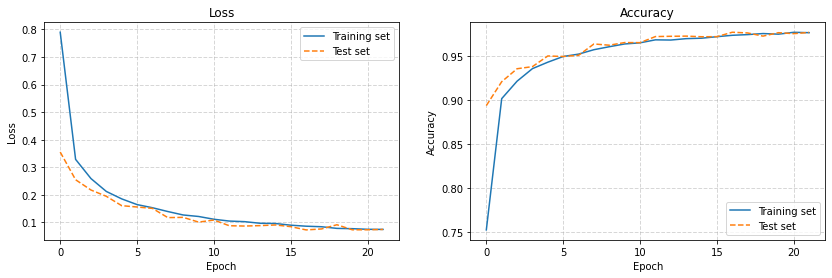

In [25]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss'] 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy'] 

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Test set', linestyle='--')

plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(accuracy, label='Training set')
plt.plot(val_accuracy, label='Test set', linestyle='--')

plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
plt.show()

#### Save model in keras Format, convert to tfjs model and zip the files

In [26]:
model.save("model.h5")

In [28]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras model.h5 model

In [ ]:
!zip model.zip model/*